In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

## Imports
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageNet
from utils.factory import create_model_and_transforms, get_tokenizer
import tqdm
import json
import os 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

## Imports
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageNet
import tqdm
from utils.subsampled_imagenet import SubsampledImageNet


In [2]:
class Params(object):
    model = 'ViT-B-32'
    pretrained = 'openai'
    device = 'cuda:0' 
    top_k_pca = 100
    dataset = 'imagenet'
    mlp_layer = 9
    input_dir = './output_dir/'
    output_dir = './output_dir/'
    neurons_num = 20
    text_descriptions = '30k'
    neurons_texts = 128
    post_gelu = True
    coefficient = 100
    
args = Params()

In [3]:
components = np.load(os.path.join(args.output_dir, f'{args.dataset}_train_mlps_{args.model}_{args.pretrained}_{args.layer}_merged.npy'),  mmap_mode='r')
components_mean = np.mean(components, axis=0, keepdims=True)
components_centered = components - components_mean
components_centered_norm = np.linalg.norm(components_centered, axis=-1)

In [7]:
all_norms_sorted = []
for n in range(components_centered_norm.shape[1]):
    all_norms_sorted.append(sorted(components_centered[:, n])[-100])

all_norms_sorted = np.array(all_norms_sorted)

In [8]:
def _convert_to_rgb(image):
    return image.convert("RGB")


visualization_preprocess = transforms.Compose(
    [
        transforms.Resize(size=224, interpolation=Image.BICUBIC),
        transforms.CenterCrop(size=(224, 224)),
        _convert_to_rgb,
    ]
)
ds_vis = SubsampledImageNet(root='/datasets/ilsvrc_2024-01-04_1601/', split="train", transform=visualization_preprocess)


In [9]:
path = f"{args.dataset}_mlps_{args.model}_{args.pretrained}_{args.mlp_layer}_{args.text_descriptions}_decomposition_omp_1.0_{args.neurons_texts}.json"
current_loaded_dict = json.load(
    open(
        os.path.join(
            args.input_dir,
            path
        ),
        "r",
    )
)

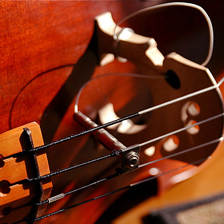

In [37]:
image_index = 2502
ds_vis[image_index][0]

In [38]:
indices = np.nonzero((components_centered_norm[image_index] > all_norms_sorted))[0]
print(list(indices))
print(len(indices))
all_words = dict()
all_words_list = dict()
for i in indices:
    for j in current_loaded_dict[str(i)]:
        if j[2] not in all_words:
            all_words[j[2]] = (j[1] * components_centered_norm[image_index, i])
            all_words_list[j[2]] = [j[1] * components_centered_norm[image_index, i]]
        else:
            all_words[j[2]] += (j[1] * components_centered_norm[image_index, i])
            all_words_list[j[2]].append(components_centered_norm[image_index, i])
all_words = sorted(all_words.items(), key=lambda x: x[1])

[113, 360, 479, 491, 499, 527, 593, 650, 674, 697, 737, 789, 951, 1247, 1295, 1433, 1756, 1793, 1913, 2286, 2496, 2536, 2681, 2722, 2857, 2908, 2922, 2924, 3057]
29


In [39]:
for j in all_words[-10:][::-1]:
    print(int(j[1]*100) / 100., j[0].strip()) 


0.69 violin
0.49 guitar
0.4 chords
0.32 faceted
0.32 cranes
0.27 elixir
0.25 sweetwater
0.24 additives
0.24 cello
0.23 parlor
